# Team Foul Exploration

This notebook explores the team foul data gathered through the scripts in this [repository](https://github.com/basketballrelativity/team-fouls). The description of the fields available can
be found in the README file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
ID_TO_TEAM_NBA = {'1610612761': 'TOR', '1610612743': 'DEN',
                  '1610612765': 'DET', '1610612740': 'NOP',
                  '1610612749': 'MIL', '1610612744': 'GSW',
                  '1610612759': 'SAS', '1610612757': 'POR',
                  '1610612746': 'LAC', '1610612742': 'DAL',
                  '1610612763': 'MEM', '1610612755': 'PHI',
                  '1610612738': 'BOS', '1610612750': 'MIN',
                  '1610612766': 'CHA', '1610612754': 'IND',
                  '1610612753': 'ORL', '1610612748': 'MIA',
                  '1610612745': 'HOU', '1610612758': 'SAC',
                  '1610612762': 'UTA', '1610612751': 'BKN',
                  '1610612737': 'ATL', '1610612756': 'PHX',
                  '1610612764': 'WAS', '1610612752': 'NYK',
                  '1610612760': 'OKC', '1610612747': 'LAL',
                  '1610612739': 'CLE', '1610612741': 'CHI'}

## NBA Finals

Complaining about fouls took stage front and center during this past year's NBA Finals. Following Game 1, Mike Budenholzer, head coach of the Milwaukee Bucks, [noted the free throw attempt discrepancy](https://www.espn.com/nba/story/_/id/31778972/milwaukee-bucks-coach-mike-budenholzer-calls-disparity-free-throws-game-1-nba-finals-frustrating) that favored the Suns 26 to 16. In a similar fashon, Suns head coach Monty Williams [expressed frustration at the free throw discrepancy](https://www.usatoday.com/story/sports/nba/suns/2021/07/13/suns-monty-williams-gamesmanship-not-behind-foul-commentary/7957873002/) in Game 3, which also was 26 to 16, but in favor of the Bucks.

Such discrepancies can be the result of myriad factors, including offensive or defensive strategy, individual player tactics, or the tightness of the officiating. While the differences in free throw attempts in these games are clear, they hardly represent the extent to which teams are affected by fouls. Increased fouls on individual players could reduce their playing time, while increased fouls on the team could push them into the penalty. Playing in the penalty could lead to additional free throw attempts by the opponent and less stringent defense for fear of committing additional fouls. Indeed, Bucks guard Pat Connaughton notes in the linked Game 1 article that the degree of defensive physicality needs to change prior to and after entering the penalty.

For each game, let's examine both the additional free throws gained for each time while the opponent is in the penalty, along with the percent of the game spent enjoying the bonus.

In [3]:
final_df = pd.read_csv("data/team_fouls_finals_20_21.csv")
final_df["team"] = [ID_TO_TEAM_NBA[str(x)] for x in final_df["team_id"]]
game_1_df = final_df[final_df["game_id"]==42000401]
game_3_df = final_df[final_df["game_id"]==42000403]

In [4]:
game_1_df[["team", "ft_gained", "own_percent_tib"]]

,team,ft_gained,own_percent_tib
0,PHX,2,0.179861
1,MIL,0,0.201736


In [5]:
game_3_df[["team", "ft_gained", "own_percent_tib"]]

,team,ft_gained,own_percent_tib
4,MIL,8,0.323958
5,PHX,4,0.189931


By these two metrics, Monty Williams seems to have the stronger case, if only through the lens of the penalty. The Bucks spent slightly more of Game 1 enjoying the bonus, with the Suns only picking up two additional free throws with [24 seconds remaining](https://www.nba.com/stats/events/?GameEventID=597&GameID=0042000401&Season=2020-21&flag=1&title=Antetokounmpo%20P.FOUL%20(P5.PN)%20(P.Fraher)&sct=plot). In Game 3, the Bucks enjoyed almost a third of the game with the Suns in the penalty, gaining eight additional free throw attempts to the Suns four.

While these games are extremely important with every call magnified, considering only two games limits the conclusions one can make about the impact of teams playing in the penalty. The following explores team foul data across multiple seasons to assess how teams perform prior to and after entering the penalty.

## Data Ingestion

- Read in the each file
- Store corresponding NBA season
- Concatenate DataFrames together

In [6]:
team_fouls_df = pd.DataFrame()
for seasons in range(16, 22):
    year_1 = str(seasons)
    year_2 = str(seasons + 1)
    tf_df = pd.read_csv(f"data/team_fouls_{year_1}_{year_2}.csv")
    tf_df["season"] = ["20" + year_1 + "-" + year_2]*len(tf_df)
    team_fouls_df = pd.concat([team_fouls_df, tf_df])

team_fouls_df.head()

,team_id,game_length,fouls_committed,fouls_3q_committed,opp_tib,opp_3q_tib,ft_allowed,ft_3q_allowed,fouls_against,fouls_3q_against,...,def_points_p,def_poss_p,def_tov_p,off_points_np,off_poss_np,off_tov_np,def_points_np,def_poss_np,def_tov_np,season
0,1610612739,2880,19,14,797,657,4,2,19,10,...,25,29.43616,4,86,80.65664,11,63,68.94464,14,2016-17
1,1610612752,2880,19,10,571,104,10,2,19,14,...,31,22.17472,3,63,68.94464,14,86,80.65664,11,2016-17
2,1610612757,2880,18,12,767,492,2,0,18,11,...,23,26.97664,3,80,66.75840,8,81,64.80640,8,2016-17
3,1610612762,2880,18,11,761,475,6,2,18,12,...,33,22.72128,4,81,64.80640,8,80,66.75840,8,2016-17
4,1610612744,2880,18,14,1164,715,8,8,19,10,...,62,45.59872,6,68,70.77952,12,67,53.40672,7,2016-17


## Offensive Production by Penalty Status

Examining offensive production when opponents are in the penalty versus when they are not should be revealing. The following examines this difference across the past six seasons. Note, the offensive ratings below may differ slightly from other sources as the calculation of possessions used here is approxmiate (see the equation at the end of Section 2 in this [document](http://vishub.org/officedocs/18024.pdf)).

In [7]:
season_total_df = pd.DataFrame(team_fouls_df.groupby('season')[["off_points_p",
                                                                "off_poss_p",
                                                                "off_points_np",
                                                                "off_poss_np"]].agg(["sum"])).reset_index()
season_total_df.columns = ["season", "penalty_points", "penalty_poss", "no_penalty_points", "no_penalty_poss"]
season_total_df

,season,penalty_points,penalty_poss,no_penalty_points,no_penalty_poss
0,2016-17,76128,65556.94400,183978,171986.50368
1,2017-18,75697,65793.60448,186072,173336.15552
2,2018-19,84019,72323.94240,189709,173995.54112
3,2019-20,64420,55140.36928,152081,139458.76608
4,2020-21,65307,55185.81184,176937,158686.43456
5,2021-22,31889,27430.12864,90750,83481.30112


In [8]:
season_total_df["ortg_penalty"] = 100*season_total_df["penalty_points"] / season_total_df["penalty_poss"]
season_total_df["ortg_no_penalty"] = 100*season_total_df["no_penalty_points"] / season_total_df["no_penalty_poss"]
season_total_df["diff"] = season_total_df["ortg_penalty"] - season_total_df["ortg_no_penalty"]
season_total_df

,season,penalty_points,penalty_poss,no_penalty_points,no_penalty_poss,ortg_penalty,ortg_no_penalty,diff
0,2016-17,76128,65556.94400,183978,171986.50368,116.124998,106.972347,9.152651
1,2017-18,75697,65793.60448,186072,173336.15552,115.052216,107.347483,7.704733
2,2018-19,84019,72323.94240,189709,173995.54112,116.170382,109.030955,7.139427
3,2019-20,64420,55140.36928,152081,139458.76608,116.829105,109.050872,7.778233
4,2020-21,65307,55185.81184,176937,158686.43456,118.340200,111.501024,6.839175
5,2021-22,31889,27430.12864,90750,83481.30112,116.255379,108.706978,7.548401


In [9]:
season_total_df = season_total_df.rename(columns={"ortg_penalty": "Penalty", "ortg_no_penalty": "No Penalty"})

In [10]:
np.mean(season_total_df["diff"])

7.693770059413306

The difference in offensive rating inside and outside of the penalty is quite stark, with teams producing at an average rate of 7.5 more points per 100 possessions with opponents in the penalty across the seasons considered. Note the 2019-20 season only considers the games played prior to the pause due to the pandemic, while the 2021-22 season considers games played through January 5, 2022. Let's visualize this below.

Text(-1.25, 126, 'in the penalty across the last six seasons')

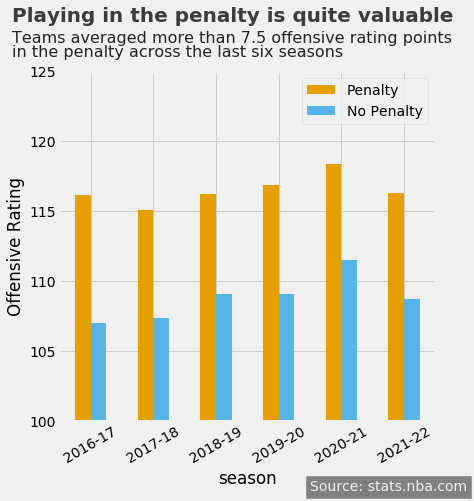

In [72]:
plt.style.use('fivethirtyeight')
colors = [[230/255,159/255,0], [86/255,180/255,233/255]]

ortg_plot = season_total_df.plot.bar(x="season", y=["Penalty", "No Penalty"], rot=30, color=colors, figsize=(6, 6))
ortg_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)
ortg_plot.set_ylabel("Offensive Rating")
ortg_plot.set_ylim(100, 125)
ortg_plot.axhline(y = 100, color = 'black', linewidth = 1.3, alpha = .7)
ortg_plot.text(x = 3.5, y = 95,
    s = 'Source: stats.nba.com',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
ortg_plot.text(x = -1.25, y = 128.5, s = "Playing in the penalty is quite valuable",
               fontsize = 20, weight = 'bold', alpha = .75)
ortg_plot.text(x = -1.25, y = 127, s = "Teams averaged more than 7.5 offensive rating points",
               fontsize = 16, alpha = .85)
ortg_plot.text(x = -1.25, y = 126, s = "in the penalty across the last six seasons",
               fontsize = 16, alpha = .85)

## Free Throws Gained in the Penalty

With the increase in offensive production with opponents in the penalty noted, how much are teams benefiting from free throw attempts gained through the penalty? These are free throws resulting from non-shooting fouls in the penalty, which would otherwise result in an inbound for the team being fouled. The following takes a look at free throws gained through the penalty versus overall team offensive rating.

In [12]:
current_df = team_fouls_df[team_fouls_df["season"] == "2021-22"]

In [13]:
current_df = current_df[current_df["team_id"].isin([int(x) for x in ID_TO_TEAM_NBA])]
current_df["Team"] = [ID_TO_TEAM_NBA[str(x)] for x in current_df["team_id"]]
team_df = pd.DataFrame(current_df.groupby(["Team", "team_id"])[["own_percent_tib", "ft_gained"]].agg(["mean"])).reset_index()
team_df.columns = ["Team", "team_id", "Percent of Game in Penalty", "Free Throw Attempts Gained per Game"]
team_df.sort_values("Percent of Game in Penalty")

,Team,team_id,Percent of Game in Penalty,Free Throw Attempts Gained per Game
20,OKC,1610612760,0.172053,2.540541
21,ORL,1610612753,0.185136,3.589744
26,SAS,1610612759,0.186765,2.756757
15,MIA,1610612748,0.191200,3.794872
23,PHX,1610612756,0.199370,4.864865
9,GSW,1610612744,0.203042,3.621622
3,CHA,1610612766,0.204078,3.692308
27,TOR,1610612761,0.204305,3.542857
12,LAC,1610612746,0.204578,3.421053
17,MIN,1610612750,0.208463,3.842105


In [14]:
ortg_df = pd.DataFrame(current_df.groupby(["Team", "team_id"])[["off_points_p",
                                                                   "off_poss_p",
                                                                   "off_points_np",
                                                                   "off_poss_np",]].agg(["sum"])).reset_index()
ortg_df.columns = ["Team", "team_id", "off_points_p", "off_poss_p", "off_points_np", "off_poss_np"]
ortg_df["Offensive Rating"] = 100*(ortg_df["off_points_p"] + ortg_df["off_points_np"]) / (ortg_df["off_poss_p"] + ortg_df["off_poss_np"])
team_df = team_df.merge(ortg_df[["Team", "team_id", "Offensive Rating"]], on=["Team", "team_id"])
team_df.sort_values("Free Throw Attempts Gained per Game")

,Team,team_id,Percent of Game in Penalty,Free Throw Attempts Gained per Game,Offensive Rating
20,OKC,1610612760,0.172053,2.540541,101.831933
26,SAS,1610612759,0.186765,2.756757,110.618039
18,NOP,1610612740,0.235245,3.263158,108.216890
7,DEN,1610612743,0.215879,3.277778,109.735160
8,DET,1610612765,0.229282,3.388889,102.389505
12,LAC,1610612746,0.204578,3.421053,107.745198
25,SAC,1610612758,0.238951,3.500000,109.465616
27,TOR,1610612761,0.204305,3.542857,111.494341
21,ORL,1610612753,0.185136,3.589744,103.493956
9,GSW,1610612744,0.203042,3.621622,112.875584


In [15]:
np.corrcoef(team_df["Free Throw Attempts Gained per Game"], team_df["Offensive Rating"])

array([[1.        , 0.56826249],
       [0.56826249, 1.        ]])

As trips to the free throw line are associated with high expected points, these additional free throws correlate fairly well with team offensive rating. This relationship is visualized below.

Text(2.6, 101.9, 'OKC')

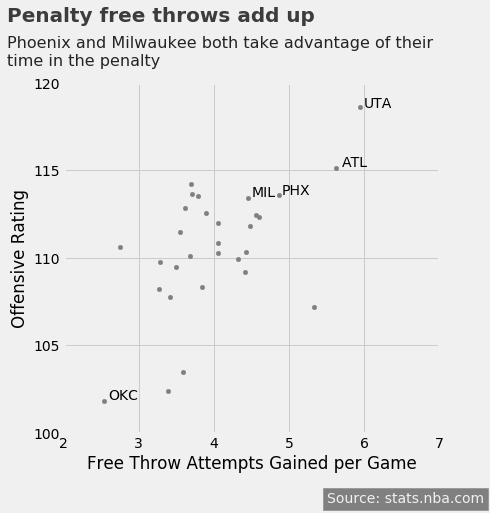

In [73]:
plt.style.use('fivethirtyeight')
team_plot = team_df.plot.scatter(x="Free Throw Attempts Gained per Game", y="Offensive Rating", c="grey", figsize=(6, 6))
team_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)
team_plot.set_yticks([100, 105, 110, 115, 120])
team_plot.set_xlabel("Free Throw Attempts Gained per Game")
team_plot.set_ylabel("Offensive Rating")
team_plot.set_xlim(2, 7)
team_plot.set_ylim(100, 120)
team_plot.text(x = 5.5, y = 96,
    s = 'Source: stats.nba.com',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
team_plot.text(x = 1.25, y = 123.5, s = "Penalty free throws add up",
               fontsize = 20, weight = 'bold', alpha = .75)
team_plot.text(x = 1.25, y = 122, s = "Phoenix and Milwaukee both take advantage of their",
               fontsize = 16, alpha = .85)
team_plot.text(x = 1.25, y = 121, s = "time in the penalty",
               fontsize = 16, alpha = .85)
team_plot.text(x=6.0, y=118.6, s="UTA")
team_plot.text(x=5.7, y=115.2, s="ATL")
team_plot.text(x=4.9, y=113.6, s="PHX")
team_plot.text(x=4.5, y=113.5, s="MIL")
team_plot.text(x=2.6, y=101.9, s="OKC")

## Shot Type Distributions

Offensive performance increases for teams enjoying the bonus and additional free throws gained correlates well with overall offensive rating. While the former point could be due to defenses playing less aggressively, offensive teams may change their approach to put more pressure on the defense.

The following groups shots into several broad shot type categories for the 2021-22 NBA season through January 5, 2021 to see if shooting behavior changes for teams while their opponents are in the penalty.

In [25]:
penalty_df = pd.read_csv("data/penalty_21_22.csv")
no_penalty_df = pd.read_csv("data/non_penalty_21_22.csv")

In [27]:
penalty_df["SHOT_TYPE_GENERAL"] = ["Jump" if "Jump" in x or "Fadeaway" in x
                                   else "Layup" if "Layup" in x
                                   else "Dunk" if "Dunk" in x
                                   else "Hook" for x in penalty_df["ACTION_TYPE"]]
no_penalty_df["SHOT_TYPE_GENERAL"] = ["Jump" if "Jump" in x or "Fadeaway" in x
                                   else "Layup" if "Layup" in x
                                   else "Dunk" if "Dunk" in x
                                   else "Hook" for x in no_penalty_df["ACTION_TYPE"]]

In [28]:
penalty_shot_df = pd.DataFrame(penalty_df.groupby("SHOT_TYPE_GENERAL")["GAME_EVENT_ID"].count()/len(penalty_df))
penalty_shot_df = penalty_shot_df.reset_index()
penalty_shot_df

,SHOT_TYPE_GENERAL,GAME_EVENT_ID
0,Dunk,0.055925
1,Hook,0.022921
2,Jump,0.642977
3,Layup,0.278177


In [29]:
no_penalty_shot_df = pd.DataFrame(no_penalty_df.groupby("SHOT_TYPE_GENERAL")["GAME_EVENT_ID"].count()/len(no_penalty_df))
no_penalty_shot_df = no_penalty_shot_df.reset_index()
no_penalty_shot_df

,SHOT_TYPE_GENERAL,GAME_EVENT_ID
0,Dunk,0.054495
1,Hook,0.028136
2,Jump,0.656532
3,Layup,0.260836


Comparing these two tables shows that layups and dunks tick up for an offense when the opposition enters the penalty. Additionally, because missed shots that result in free throws are not included in this dataset, the changes in layups and dunks may be understated as those shots tend to result in free throws more often.

Let's visualize these differences.

In [59]:
penalty_shot_df["Type"] = ["Penalty"]*len(penalty_shot_df)
no_penalty_shot_df["Type"] = ["No Penalty"]*len(no_penalty_shot_df)
shot_df = pd.concat([penalty_shot_df, no_penalty_shot_df])
shot_df.columns = ["Shot Type", "Fraction of Shot Types", "Penalty Status"]
shot_df

,Shot Type,Fraction of Shot Types,Penalty Status
0,Dunk,0.055925,Penalty
1,Hook,0.022921,Penalty
2,Jump,0.642977,Penalty
3,Layup,0.278177,Penalty
0,Dunk,0.054495,No Penalty
1,Hook,0.028136,No Penalty
2,Jump,0.656532,No Penalty
3,Layup,0.260836,No Penalty


Text(1.01, 0.02, '0.03')

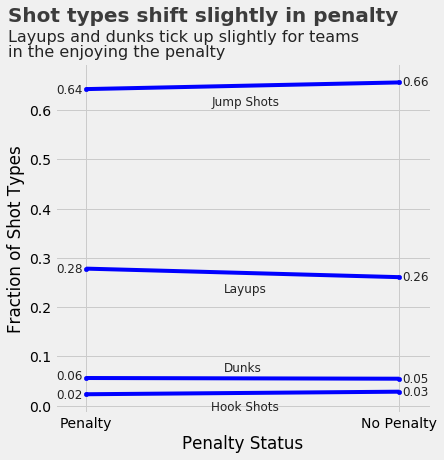

In [76]:
plt.style.use('fivethirtyeight')
shot_plot = shot_df.plot.scatter(x="Penalty Status", y="Fraction of Shot Types", figsize=(6, 6), color="blue")
shot_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)
shot_plot.plot([0, 1], [shot_df[(shot_df["Shot Type"]=="Jump") & (shot_df["Penalty Status"]=="Penalty")]["Fraction of Shot Types"].iloc[0],
                        shot_df[(shot_df["Shot Type"]=="Jump") & (shot_df["Penalty Status"]=="No Penalty")]["Fraction of Shot Types"].iloc[0]], 'b-')
shot_plot.plot([0, 1], [shot_df[(shot_df["Shot Type"]=="Layup") & (shot_df["Penalty Status"]=="Penalty")]["Fraction of Shot Types"].iloc[0],
                        shot_df[(shot_df["Shot Type"]=="Layup") & (shot_df["Penalty Status"]=="No Penalty")]["Fraction of Shot Types"].iloc[0]], 'b-')
shot_plot.plot([0, 1], [shot_df[(shot_df["Shot Type"]=="Dunk") & (shot_df["Penalty Status"]=="Penalty")]["Fraction of Shot Types"].iloc[0],
                        shot_df[(shot_df["Shot Type"]=="Dunk") & (shot_df["Penalty Status"]=="No Penalty")]["Fraction of Shot Types"].iloc[0]], 'b-')
shot_plot.plot([0, 1], [shot_df[(shot_df["Shot Type"]=="Hook") & (shot_df["Penalty Status"]=="Penalty")]["Fraction of Shot Types"].iloc[0],
                        shot_df[(shot_df["Shot Type"]=="Hook") & (shot_df["Penalty Status"]=="No Penalty")]["Fraction of Shot Types"].iloc[0]], 'b-')
shot_plot.set_xlim(-0.1, 1.1)
shot_plot.text(x = -0.25, y = 0.78, s = "Shot types shift slightly in penalty",
               fontsize = 20, weight = 'bold', alpha = .75)
shot_plot.text(x = -0.25, y = 0.74, s = "Layups and dunks tick up slightly for teams",
               fontsize = 16, alpha = .85)
shot_plot.text(x = -0.25, y = 0.71, s = "in the enjoying the penalty",
               fontsize = 16, alpha = .85)
shot_plot.text(x = 0.4, y = 0.61, s = "Jump Shots",
               fontsize = 12, alpha = .85)
shot_plot.text(x = -0.095, y = 0.635, s = "0.64",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 1.01, y = 0.65, s = "0.66",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 0.44, y = 0.23, s = "Layups",
               fontsize = 12, alpha = .85)
shot_plot.text(x = -0.095, y = 0.27, s = "0.28",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 1.01, y = 0.255, s = "0.26",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 0.44, y = 0.07, s = "Dunks",
               fontsize = 12, alpha = .85)
shot_plot.text(x = -0.095, y = 0.0525, s = "0.06",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 1.01, y = 0.0475, s = "0.05",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 0.4, y = -0.01, s = "Hook Shots",
               fontsize = 12, alpha = .85)
shot_plot.text(x = -0.095, y = 0.015, s = "0.02",
               fontsize = 12, alpha = .85)
shot_plot.text(x = 1.01, y = 0.02, s = "0.03",
               fontsize = 12, alpha = .85)

## Conclusions

- Teams see a significant increase in offensive production after their opponents move into the penalty
- Better offensive teams overall benefit from more free throws gained through penalty
- Offensive approach changes slightly for teams enjoying the bonus, with layup and dunk attempts increasing